In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from googleapiclient.discovery import build
from IPython.display import JSON
youtube_key = os.getenv("YOUTUBE_API")

In [3]:
channel = ['UCyaN6mg5u8Cjy2ZI4ikWaug']
youtube = build('youtube', 'v3', developerKey=youtube_key)
request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel)
    )
response = request.execute()
print(response)


{'kind': 'youtube#channelListResponse', 'etag': 'L7kXC-Sn4Vdr3Tz16F4u2gD0bkw', 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': '25bESOtPtAIAHqLS4gbhd7sUn_A', 'id': 'UCyaN6mg5u8Cjy2ZI4ikWaug', 'snippet': {'title': 'My First Million', 'description': 'A podcast from HubSpot Media where Sam Parr and Shaan Puri brainstorm new business ideas based on trends & opportunities they see in the market. Sometimes they bring on famous guests like Mr. Beast, Rob Dyrdek, and Sophia Amoruso to brainstorm with them.', 'customUrl': '@myfirstmillionpod', 'publishedAt': '2015-01-26T21:19:39Z', 'thumbnails': {'default': {'url': 'https://yt3.ggpht.com/S1Hn_q8IGAIYOMitrKGMfGNopYwhaYATEhQUqXyac1t2t0WPMqCSZmCMdHU4bsqli0H1X6nM=s88-c-k-c0x00ffffff-no-rj', 'width': 88, 'height': 88}, 'medium': {'url': 'https://yt3.ggpht.com/S1Hn_q8IGAIYOMitrKGMfGNopYwhaYATEhQUqXyac1t2t0WPMqCSZmCMdHU4bsqli0H1X6nM=s240-c-k-c0x00ffffff-no-rj', 'width': 240, 'height': 240}, 'high': {

In [4]:
def channel_stats(youtube, channel):
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        id=','.join(channel)
    )
    response = request.execute()
    
    # getting the playlist ids
    playlist_id = None
    if 'items' in response and len(response['items']) > 0:
        playlist_id = response['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    
    print(f"The playlist ID is: {playlist_id}")
    return playlist_id

#getting video ids
def get_video_ids(youtube, playlist_id):
    video_ids = []
    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
   
    return video_ids

playlist_id = channel_stats(youtube, channel)
video_ids = get_video_ids(youtube, playlist_id)



The playlist ID is: UUyaN6mg5u8Cjy2ZI4ikWaug


In [5]:
def get_video_details(youtube, video_ids):
    if video_ids is None:
        raise ValueError("video_ids is None. Please provide a valid list of video IDs.")

    all_video_info = []

    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=','.join(video_ids[0:50])
    )
    response = request.execute()

    for video in response['items']:
        basic_stats = {
            'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
            'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
            'contentDetails': ['duration', 'definition', 'caption']
        }
        video_info = {}
        video_info['video_id'] = video['id']

        for k in basic_stats.keys():
            for v in basic_stats[k]:
                try:
                    video_info[v] = video[k][v]
                except KeyError:
                    video_info[v] = None

        all_video_info.append(video_info)
    return pd.DataFrame(all_video_info)

video_df = get_video_details(youtube, video_ids)     
video_count = len(video_df)
print(video_count)

video_df

50


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,P39dOoLeoSg,My First Million,"Business Tricks We've Learned From Gamblers, P...",📈 Steal our playbook on how to spot business t...,"[my first million, my first million podcast, m...",2024-06-28T11:00:21Z,17488,582,0,90,PT58M51S,hd,false
1,QrJFNZWX8Ew,My First Million,'Roaring Kitty' Keith Gill's $30M Business?!,'Roaring Kitty' Keith Gill's $30M Business?!,"[my first million, my first million podcast, m...",2024-06-27T21:02:53Z,6721,146,0,22,PT38S,hd,false
2,ZQhGrZnt3jI,My First Million,The Dark Story Behind Ozempic’s $500B Business...,[Steal This] Grab our go-to copywriting framew...,"[my first million, my first million podcast, m...",2024-06-26T11:49:05Z,19817,529,0,170,PT1H13M18S,hd,false
3,kuivk5PdW4I,My First Million,5 Business Ideas To Start Today With $0 ft. Sh...,[Steal This] Grab Sam & Shaan's go-to copywrit...,"[my first million, my first million podcast, m...",2024-06-25T11:00:47Z,36801,913,0,117,PT1H3M55S,hd,false
4,bS4M74mhFvw,My First Million,The Genius That Grew Chipotle to $88B Is...,The Genius That Grew Chipotle to $88B Is...,"[my first million, my first million podcast, m...",2024-06-23T19:40:19Z,16506,442,0,18,PT45S,hd,false
5,biL_BSFbHZk,My First Million,3 Things You Need To Outperform 99% Of Entrepr...,[Steal This] Grab our go-to copywriting framew...,"[my first million, my first million podcast, m...",2024-06-21T19:08:21Z,36048,752,0,92,PT1H6M25S,hd,false
6,tT4C5geCHTk,My First Million,Watch These 40 Minutes To Unf*ck Your Life,[Steal This] Grab our go-to copywriting framew...,"[my first million, my first million podcast, m...",2024-06-19T12:35:17Z,44629,1085,0,93,PT46M5S,hd,false
7,lSIj10t-AWA,My First Million,"""I Died and Went to Heaven"" - Warren Buffett o...","""I Died and Went to Heaven"" - Warren Buffett o...","[my first million, my first million podcast, m...",2024-06-18T02:04:13Z,10576,253,0,6,PT47S,hd,false
8,wec56OH3n_w,My First Million,EXCLUSIVE: $3B Founder Reveals His Next Big Idea,[Steal This] Get our favorite copywriting fram...,"[my first million, my first million podcast, m...",2024-06-17T14:46:51Z,21465,446,0,83,PT36M30S,hd,false
9,zwlPo4c0fvk,My First Million,Millionaire Worth $40M HATES Side Hustles,Millionaire Worth $40M HATES Side Hustles,"[my first million, my first million podcast, m...",2024-06-14T23:45:38Z,11932,466,0,9,PT53S,hd,false


In [6]:
def get_comments_in_videos(youtube, video_ids):
    all_comments = []
    
    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet,replies",
            videoId=video_id,
            maxResults=100 
        )
        response = request.execute()

        while request is not None:
            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comment_info = {
                    'video_id': video_id,
                    'comment_id': item['id'],
                    'author': comment['authorDisplayName'],
                    'text': comment['textOriginal'],
                    'like_count': comment['likeCount'],
                    'published_at': comment['publishedAt'],
                }
                all_comments.append(comment_info)
            
            if 'nextPageToken' in response:
                request = youtube.commentThreads().list(
                    part="snippet,replies",
                    videoId=video_id,
                    pageToken=response['nextPageToken'],
                    maxResults=100
                )
                response = request.execute()
            else:
                request = None
                
    return pd.DataFrame(all_comments)

comments_df = get_comments_in_videos(youtube, video_ids)


In [7]:

numeric_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

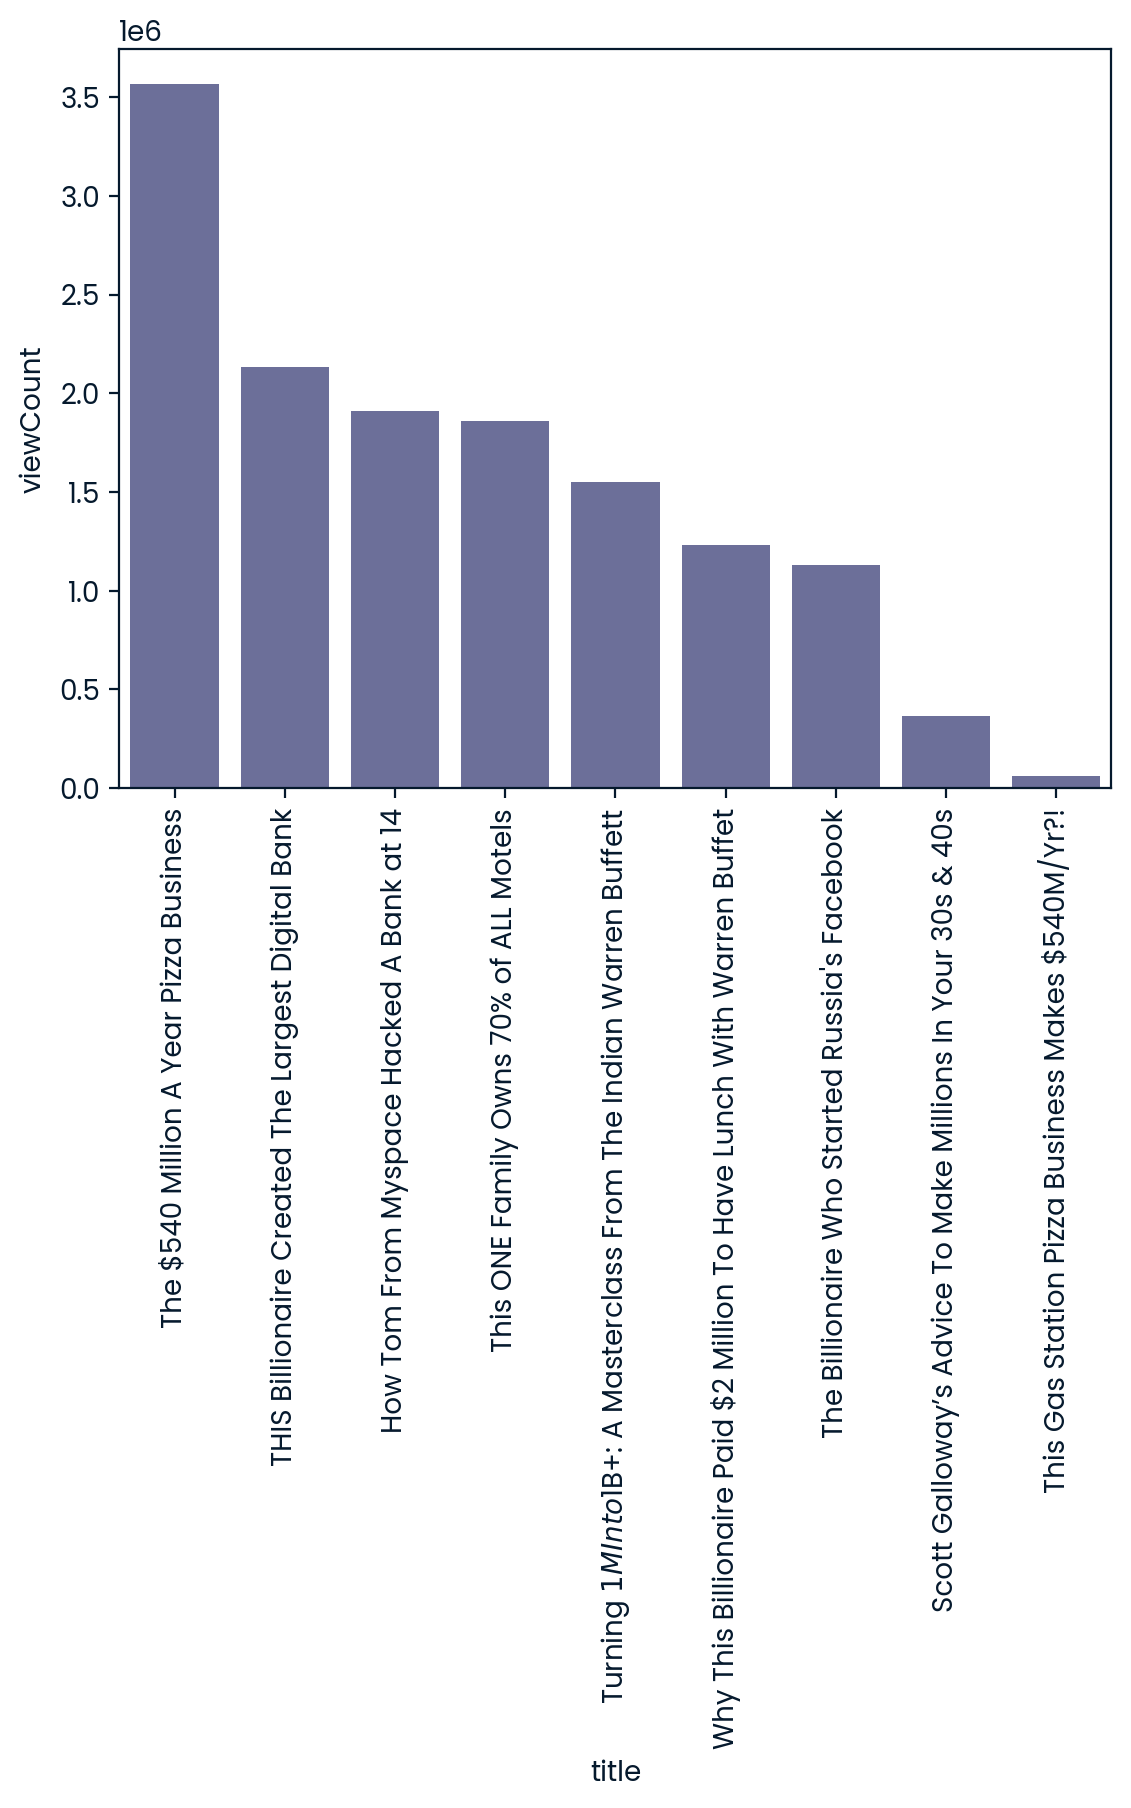

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


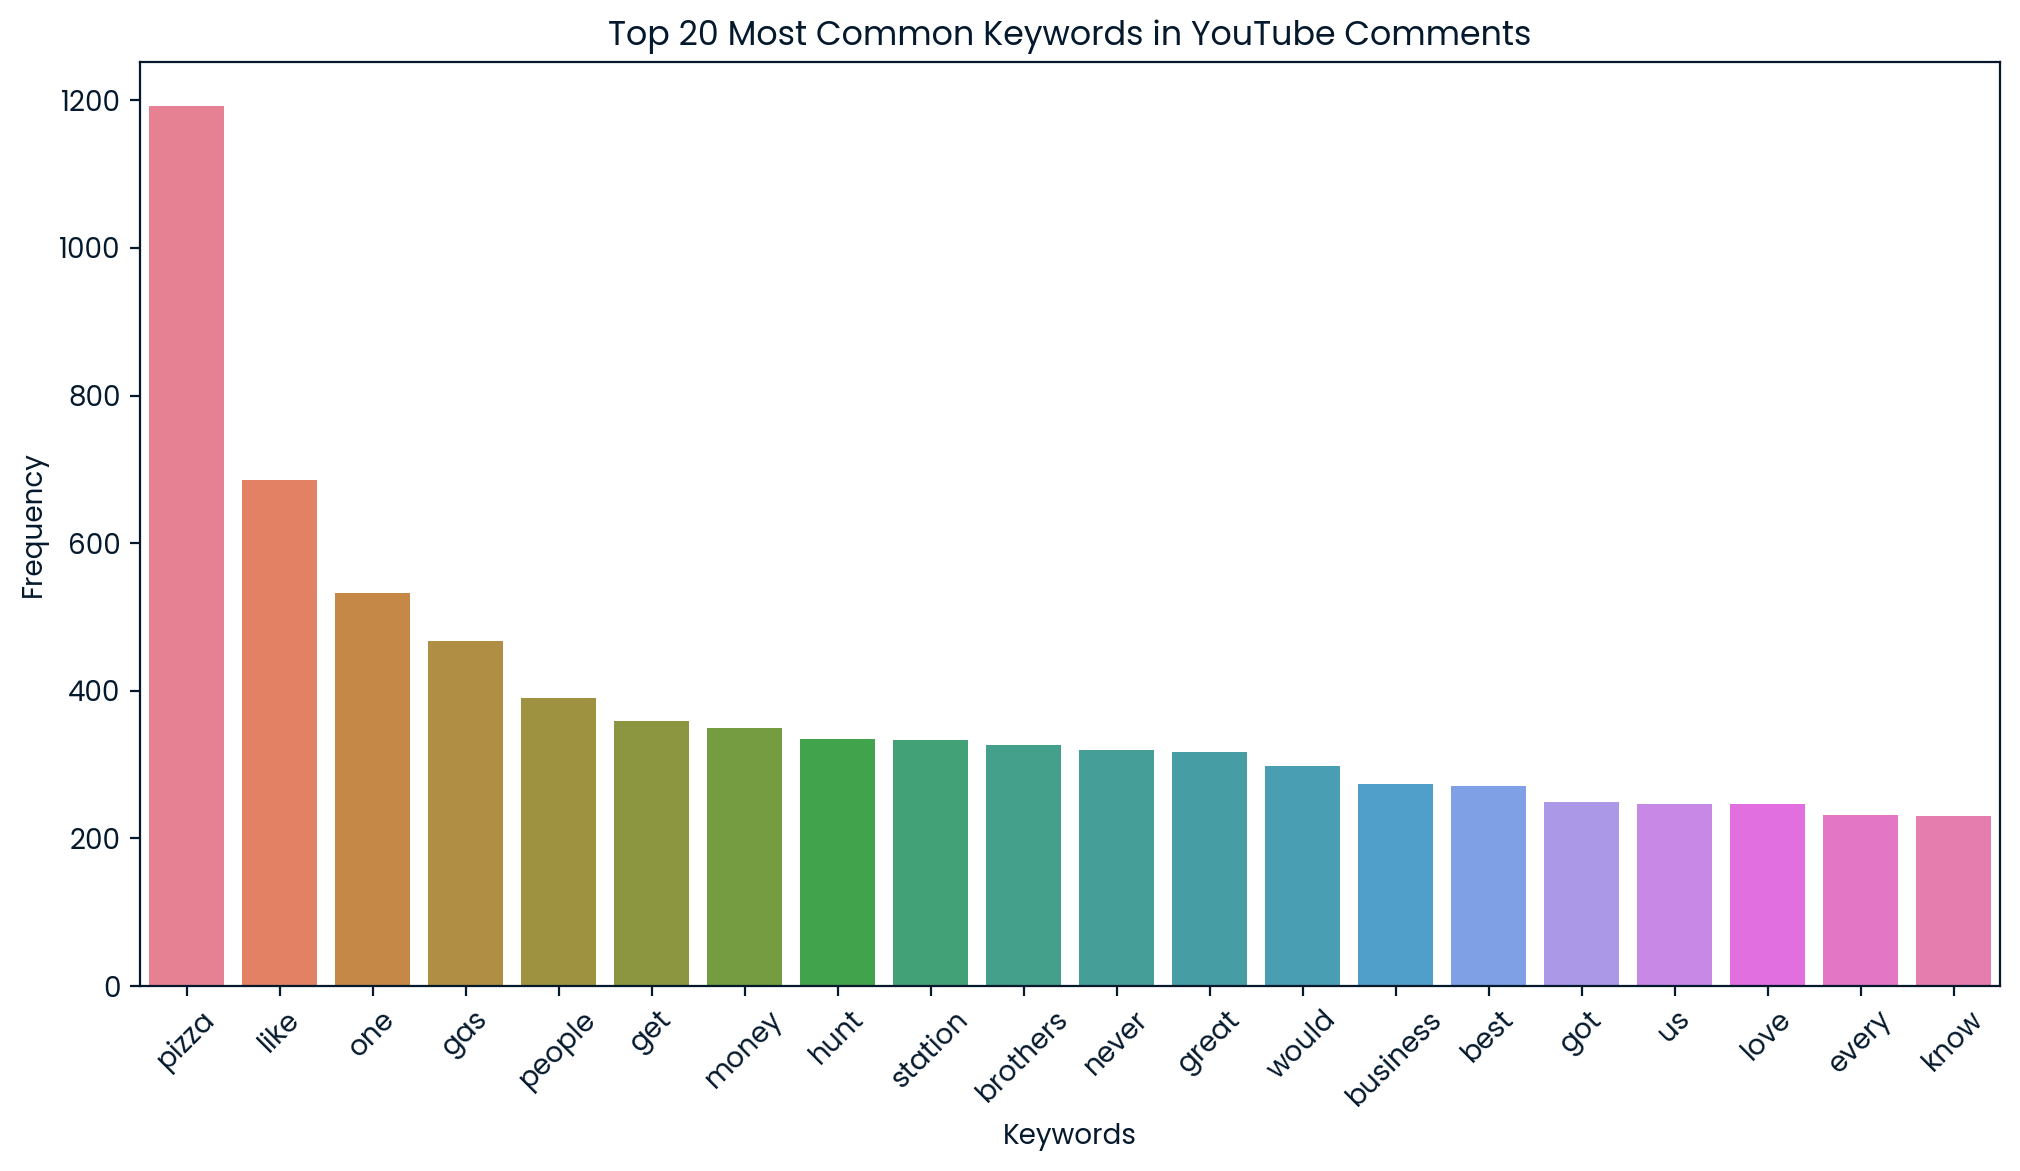

In [30]:
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def extract_keywords(comments_df):
    stop_words = set(stopwords.words('english'))
    all_words = ' '.join(comments_df['text']).lower()
    word_tokens = word_tokenize(all_words)
    filtered_words = [w for w in word_tokens if w.isalnum() and w not in stop_words]
    word_counts = Counter(filtered_words)
    
    return word_counts.most_common(20)

common_keywords = extract_keywords(comments_df)

keywords, counts = zip(*common_keywords)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(keywords))
sns.barplot(x=list(keywords), y=list(counts), palette=palette)
plt.title('Top 20 Most Common Keywords in YouTube Comments')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


{'sam': 144, 'shaan': 162}


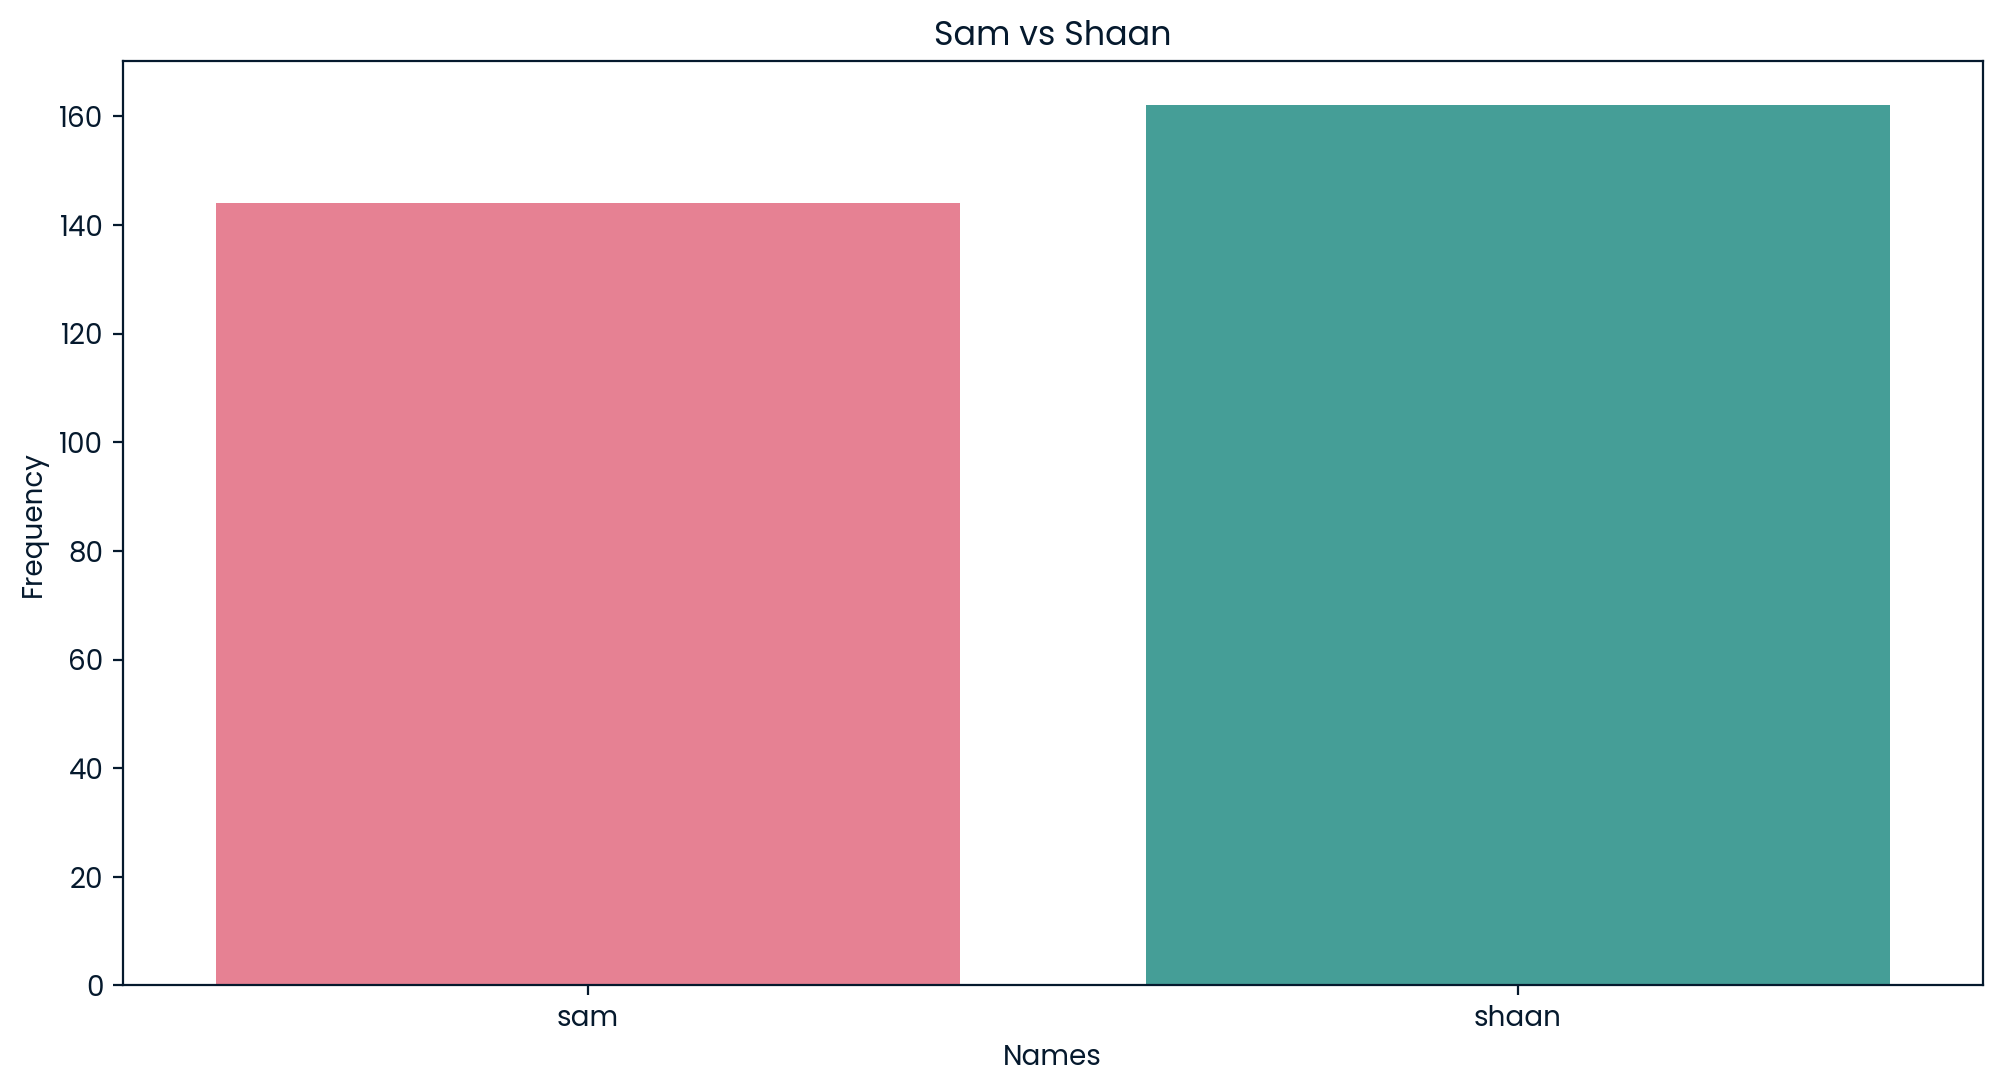

In [15]:
def sam_vs_shaan(comments_df):
    names = ['sam', 'shaan']
    all_words = ' '.join(comments_df['text']).lower()
    word_tokens = word_tokenize(all_words)
    filtered_words = [w for w in word_tokens if w.isalnum()]
    names_counts = Counter(filtered_words)

    sam_count = names_counts['sam']
    shaan_count = names_counts['shaan']

    return {'sam': sam_count, 'shaan': shaan_count}

sam_vs_shaan_counts = sam_vs_shaan(comments_df)
print(sam_vs_shaan_counts)

names, counts = zip(*sam_vs_shaan_counts.items())

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", len(names))
sns.barplot(x=list(names), y=list(counts), palette=palette)
plt.title('Sam vs Shaan')
plt.xlabel('Names')
plt.ylabel('Frequency')
plt.show()


In [18]:
def top_commenters(comments_df, top_n=10):
    commenter_counts = comments_df['author'].value_counts().head(top_n)
    
    top_commenters_df = commenter_counts.reset_index()
    top_commenters_df.columns = ['author', 'comment_count']
    
    return top_commenters_df

top_commenters_df = top_commenters(comments_df)
print(top_commenters_df)


                author  comment_count
0   @grahamkennedy7221             24
1     @faisalislam9840             22
2     @Pcoxproductions             19
3      @antoniocollins             16
4       @eugeniocg3079             14
5  @moneymakingsim4314             13
6            @EcomCarl             11
7         @josemelo_97             11
8              @sutats             10
9              @togoni              9


In [31]:
def engagement_rate_analysis(video_df):
    video_df['engagement_rate'] = (video_df['likeCount'] + video_df['commentCount']) / video_df['viewCount']
    return video_df[['title', 'engagement_rate']].sort_values(by='engagement_rate', ascending=False)

top_engagement_rates = engagement_rate_analysis(video_df)
top_engagement_rates


,title,engagement_rate
46,How To Master The Hook Of A Video,0.049518
37,How This Medical Center Can Make $50 Million,0.046867
0,"The Dark, Untold Story of Ozempic",0.041742
36,The $540 Million A Year Pizza Business,0.039390
7,Millionaire Worth $40M HATES Side Hustles,0.039043
28,THIS Billionaire Created The Largest Digital Bank,0.038773
39,The #1 Reason For Divorce,0.038728
41,The Announcement You've Been Waiting For,0.038242
26,Why This Billionaire Paid $2 Million To Have L...,0.038208
49,Her Viral Formula Breaks 100 Million Views On ...,0.035398


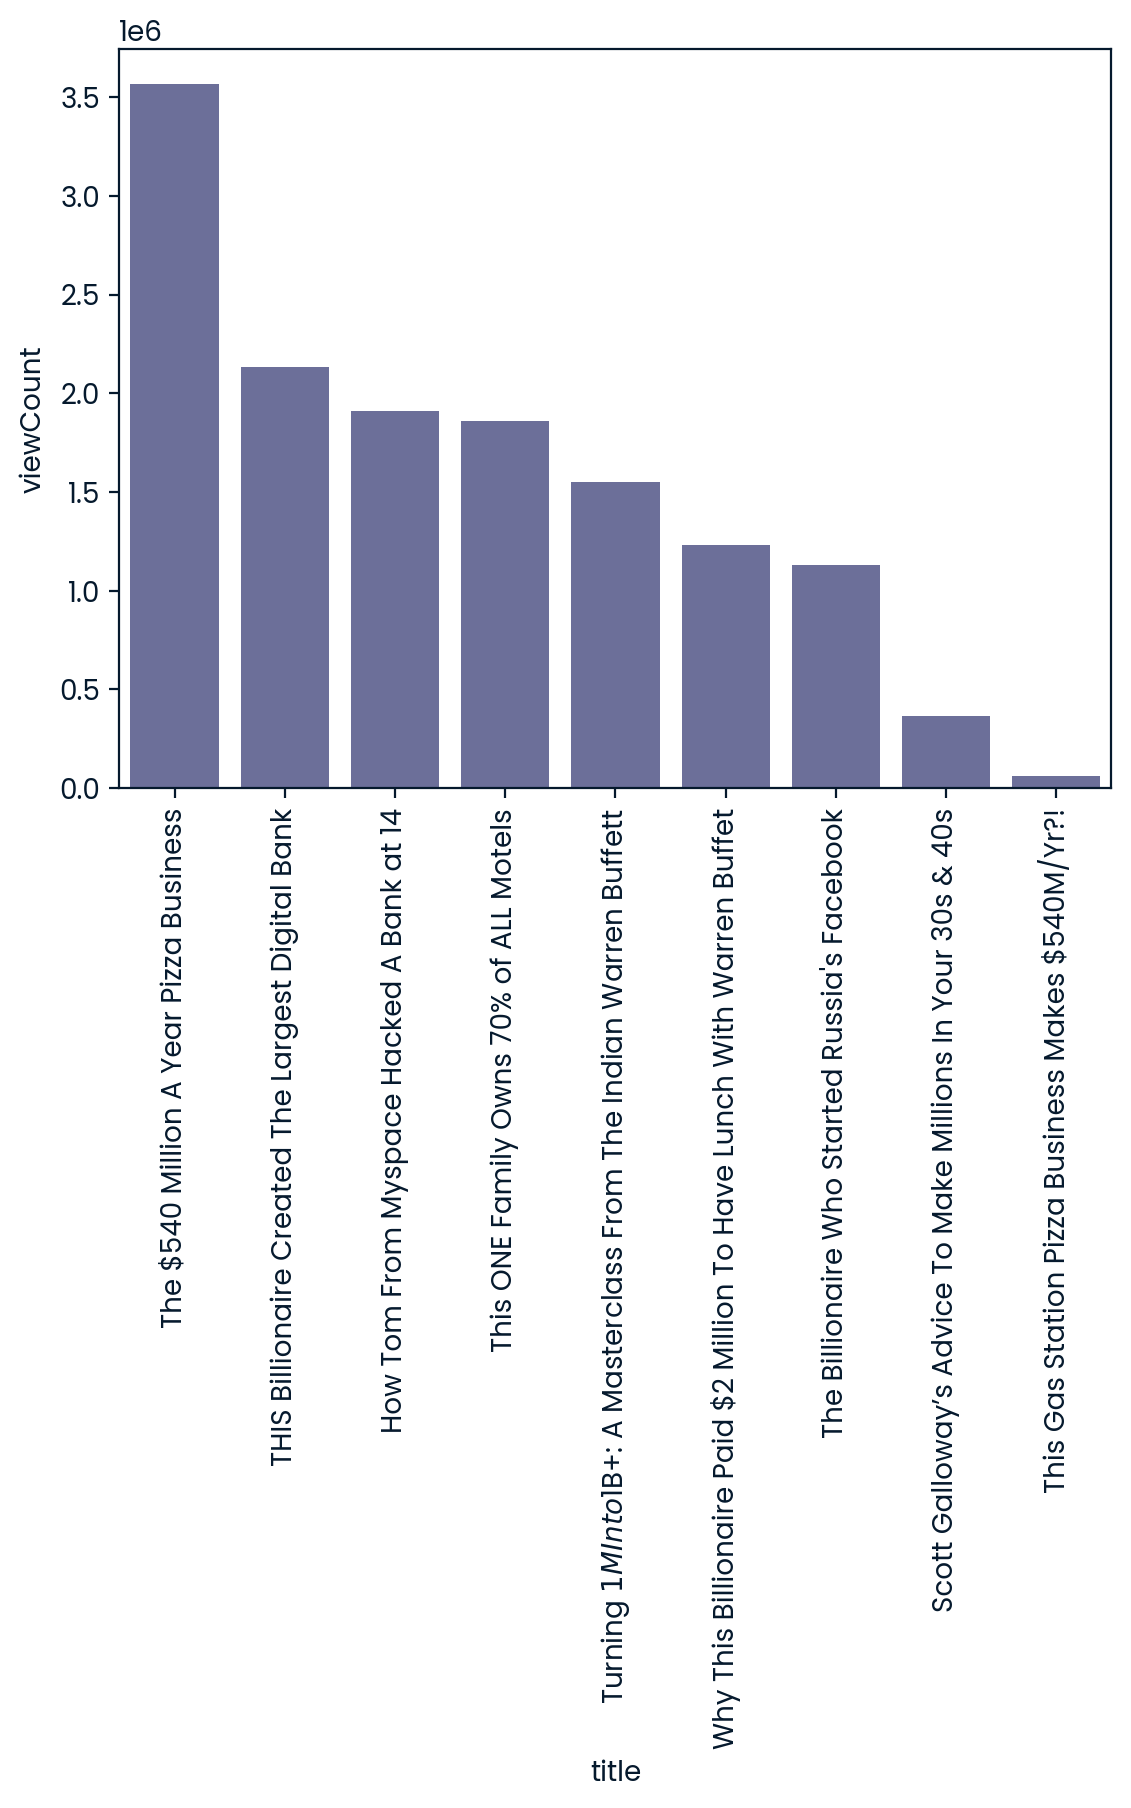

In [25]:
def content_performance_analysis(video_df):
    video_df['viewCount'] = video_df['viewCount'].astype(float)
    video_df['likeCount'] = video_df['likeCount'].astype(float)
    video_df['commentCount'] = video_df['commentCount'].astype(float)
    
    max_views = video_df['viewCount'].max()
    max_likes = video_df['likeCount'].max()
    max_comments = video_df['commentCount'].max()
    
    video_df['view_score'] = video_df['viewCount'] / max_views
    video_df['like_score'] = video_df['likeCount'] / max_likes
    video_df['comment_score'] = video_df['commentCount'] / max_comments
    
    video_df['performance_score'] = video_df['view_score'] + video_df['like_score'] + video_df['comment_score']
    
    performance_metrics = video_df[['title', 'viewCount', 'likeCount', 'commentCount', 'performance_score']]
    return performance_metrics.sort_values(by='performance_score', ascending=False)

top_performers = content_performance_analysis(video_df)

ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)